In [ ]:
#Importing packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv(r'C:\Users\User\Downloads\pythom stuff\NoShow.csv')

#Checking the Dataset 

In [3]:
df.head() #Checking the Dataset 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Information about dataset

PatientId: Identification of a patient,
AppointmentID: Identification of each appointment
Gender: Male or Female,
Age: How old is the patient
Neighbourhood: Where the appointment takes place.
Hypertension: Hypertension patient or not,
Diabetes: Diabetes patient or not
Alcoholism: Is the patient addicted to alcohol or not,
Handicap: Handicap patient or not
SMSReceived: Did the patient receive a message on time or not,
NoShow: It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [88]:
df.describe() #Information about dataset

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the information above, we may infer the following:

The patient is 37 years old on average.
The youngest patient is a newborn (age -1). (which seems to be incorrect).
A 115-year-old patient is the oldest.
Only around half of the SMSes sent were read.

In [114]:
sum(df.isnull().sum()) #Checking for Null Values

0

In [115]:
df.duplicated().sum() #Checking for duplicated values

0

In [117]:
df.query('Age == -1') #Checking the row that has negative age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
99832,465943158731293.0,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


Dropping the row

In [119]:
df.drop(df.query('Age == -1').index, inplace = True) #dropping the age that is negative

In [ ]:
Checks

In [120]:
df.query('Age == -1') #checking if code worked

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow


We create a new column called waiting days from the days between appointment day and scheduled day in the cell above. To confirm, look at the code cell below.

In [124]:
DaysWaited = df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date #creating a new column DaysWaited
DaysWaited = DaysWaited.dt.days

df.insert(5, 'DaysWaited',DaysWaited)

To display the age range of the patients, we add a new column called AgeRange to the cell below. To confirm, look at the code cell below.

In [133]:
range_labels = ['0-4', '5-9', '10-17', '18-32', '33-52', '53-75', '76+'] #creating a new column age range 
MaxAge = df.Age.max()
bins = [0, 4, 9, 17, 32, 52, 75, MaxAge]

AgeRange = pd.cut(df['Age'],labels=range_labels, bins=bins)
df.insert(7, 'AgeRange', AgeRange)

In [153]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,DaysWaited,Age,AgeRange,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,29872499824296.0,5642903,F,2016-04-29 18:38:08,2016-04-29,0,62,53-75,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27,2016-04-29,0,56,53-75,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04,2016-04-29,0,62,53-75,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,0,8,5-9,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23,2016-04-29,0,56,53-75,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274.0,5626772,F,2016-04-27 08:36:51,2016-04-29,2,76,76+,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661.0,5630279,F,2016-04-27 15:05:12,2016-04-29,2,23,18-32,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123.0,5630575,F,2016-04-27 15:39:58,2016-04-29,2,39,33-52,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972.0,5638447,F,2016-04-29 08:02:16,2016-04-29,0,21,18-32,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297.0,5629123,F,2016-04-27 12:48:25,2016-04-29,2,19,18-32,CONQUISTA,0,0,0,0,0,0,No


ScheduledDay and AppointmentDay datatypes are both changed to datetime
PatientId and AppointmentID datatypes are both changed to object

In [110]:

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']) #ScheduledDay and AppointmentDay datatypes are both changed to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']) 

df['PatientId'] = df['PatientId'].astype('str') #PatientId and AppointmentID datatypes are both changed to object
df['AppointmentID'] = df['AppointmentID'].astype('str')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   AppointmentID   110527 non-null  object        
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), obje

In [ ]:
#Renaming incorrect column names

In [6]:

df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [8]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


THE DISTRIBUTION OF GENDER

F    0.649974
M    0.350026
Name: Gender, dtype: float64
Total Patients:110526


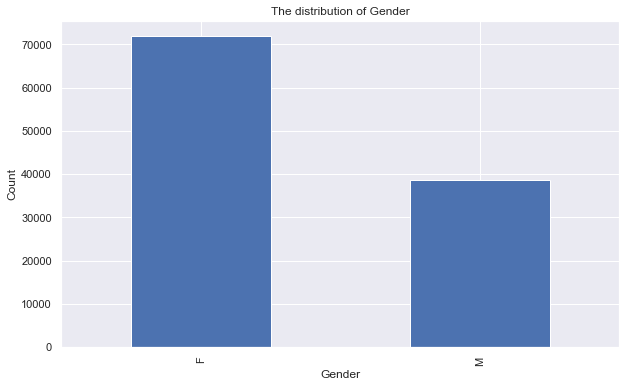

In [129]:
print(df['Gender'].value_counts(normalize = True))    #printing the percentage for gender distribution
print('Total Patients:' + str(df['Gender'].value_counts().sum()))

plt.figure(figsize=(10,6)) #plotting a bar chart for the distribution of gender
df['Gender'].value_counts().plot(kind= 'bar')
plt.title('The distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In total, there are 110527 appointments. 35% of the appointments are made by men, while 65% of the appointments are made by women. This suggests that the likelihood of illness is divided unequally across men and women.

In [ ]:
88

In [11]:
df['Handicap'].value_counts() #The distribution of handicapped patients

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

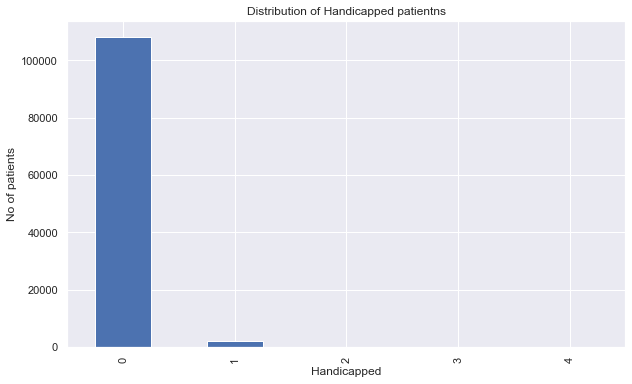

In [157]:
plt.figure(figsize=(10,6)) #plotting a bar chart for the distribution of handicap patients
df['Handicap'].value_counts().plot(kind= 'bar', color='b')
plt.title('Distribution of Handicapped patientns')
plt.xlabel('Handicapped')
plt.ylabel('No of patients')
plt.show()

Distribution of Ages

Text(0, 0.5, 'Number of patients')

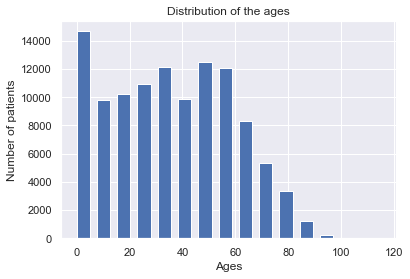

In [171]:
fig, ax = plt.subplots()    #plotting chart for the distribution of ages 
ax.hist(df['Age'], bins=15, width=5.0)
ax.set_xlabel("Ages")
ax.set_title('Distribution of the ages', fontweight='light')
ax.set_ylabel('Number of patients')

Text(0, 0.5, 'Number of appointments')

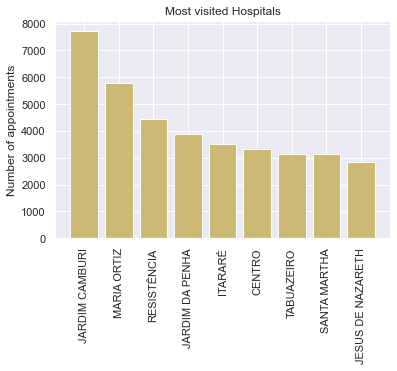

In [25]:
most_visited_hospitals = df.Neighbourhood.value_counts()[0: 9]  #Most visited hospitals by neighborhood chart
names = most_visited_hospitals.index
sns.set()
fig, ax = plt.subplots()
ax.bar(most_visited_hospitals.index, most_visited_hospitals.values, color='y'); #chart showing the information gotten above 
plt.xticks(rotation=90);
ax.set_title('Most visited Hospitals')
ax.set_ylabel('Number of appointments')

In [26]:
Data = df['Scholarship'].value_counts() #Distribution of scholarship
Data

0    99666
1    10861
Name: Scholarship, dtype: int64

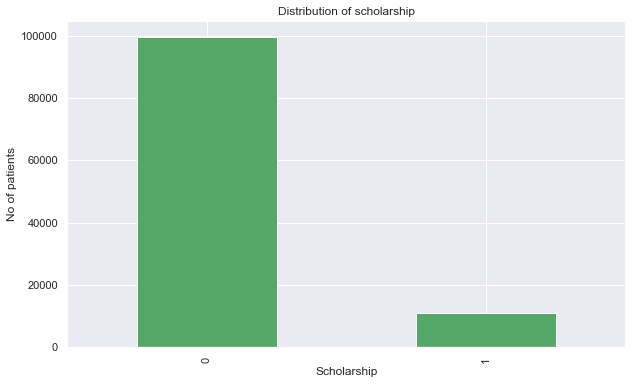

In [156]:

plt.figure(figsize=(10,6))
df['Scholarship'].value_counts().plot(kind= 'bar', color='g')
plt.title('Distribution of scholarship')
plt.xlabel('Scholarship')
plt.ylabel('No of patients')
plt.show()

Distribution of Hypertensive patients

In [40]:
Data = df['Hypertension'].value_counts() #Distribution of Hypertensive patients
Data 

0    88726
1    21801
Name: Hypertension, dtype: int64

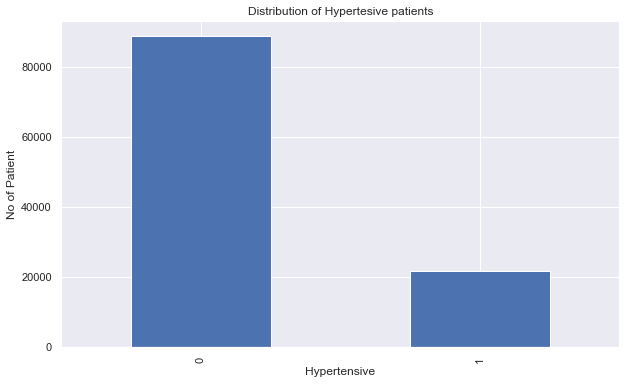

In [158]:
plt.figure(figsize=(10,6)) #plotting chart for the distribution of hypertensive patients
df['Hypertension'].value_counts().plot(kind= 'bar')
plt.title('Distribution of Hypertesive patients')
plt.xlabel('Hypertensive')
plt.ylabel('No of Patient')
plt.show()

Distribution of Diabetes patients

In [48]:
Data = df['Diabetes'].value_counts() #Distribution of patients with diabetes and not
Data8

0    102584
1      7943
Name: Diabetes, dtype: int64

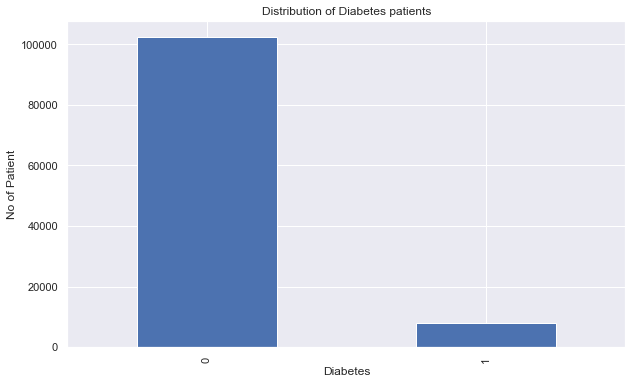

In [160]:
plt.figure(figsize=(10,6)) #plotting chart for the distribution of ages 
df['Diabetes'].value_counts().plot(kind= 'bar')
plt.title('Distribution of Diabetes patients')
plt.xlabel('Diabetes')
plt.ylabel('No of Patient')
plt.show()

Distribution of patients that are addicted to alcohol

In [50]:
Data = df['Alcoholism'].value_counts() #Distribution of patients who drink alcohol and not
Data

0    107167
1      3360
Name: Alcoholism, dtype: int64

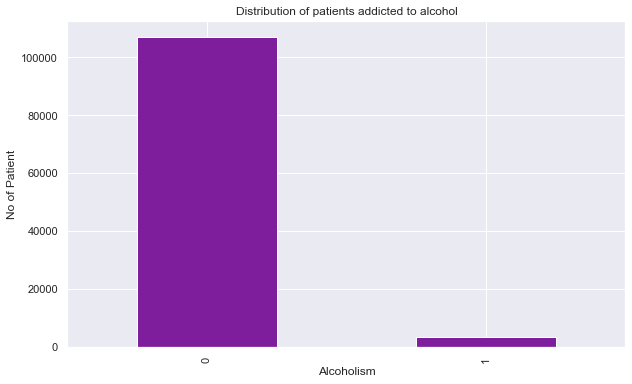

In [159]:
plt.figure(figsize=(10,6)) # chart showing Distribution of patients with diabetes and not
df['Alcoholism'].value_counts().plot(kind= 'bar', color='#7E1E9C')
plt.title('Distribution of patients addicted to alcohol')
plt.xlabel('Alcoholism')
plt.ylabel('No of Patient')
plt.show()

Distribution of whether a patient receives sms for reminder on their appointment

In [ ]:
Data = df['SMSReceived'].value_counts() #Distribution of whether a patient receives sms for reminder on their appointment
Data

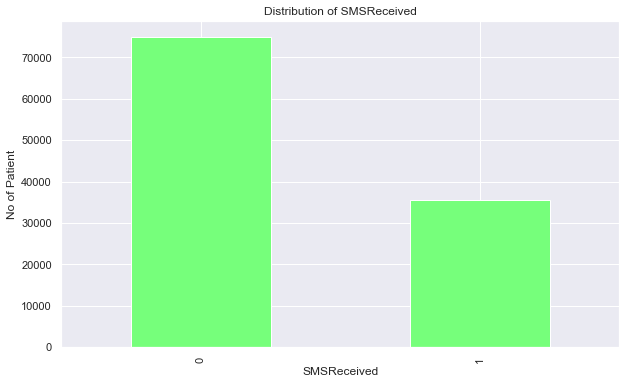

In [141]:
plt.figure(figsize=(10,6)) # chart showing Distribution of that receives sms or not 
df['SMSReceived'].value_counts().plot(kind= 'bar', color='#76FF7B')
plt.title('Distribution of SMSReceived')
plt.xlabel('SMSReceived')
plt.ylabel('No of Patient')
plt.show()

In [65]:
Data = df['NoShow'].value_counts() #getting the number of people who show up and those who dont
Data

No     88208
Yes    22319
Name: NoShow, dtype: int64

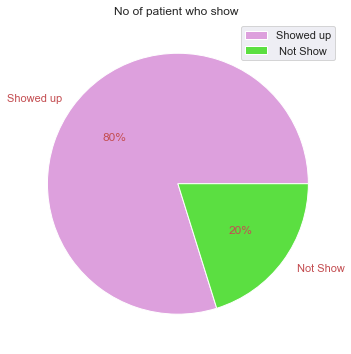

In [99]:
f=plt.figure(figsize=(10,6)) #pie chart to represent patients who show up and those who dont 
plt.pie(df['NoShow'].value_counts().values,labels=['Showed up',' Not Show'],autopct='%.0f%%', textprops={'color':"r"},colors=['#DDA0DD', '#5BDF41'])
plt.title('No of patient who show ')
plt.legend()
plt.show()

Describing the neigbourhoods with the highest attendance rate with a bar chart

Text(0, 0.5, 'Count')

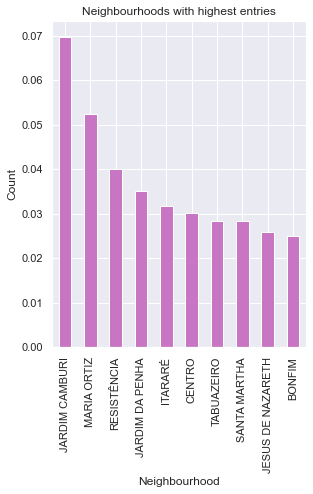

In [84]:
plt.figure(figsize=(10,6)) #Describing the neigbourhoods with the highest attendance rate with a bar chart
plt.subplot(1,2,1)
top_10_neighbhourhoods = df['Neighbourhood'].value_counts(normalize = True).head(10)
top_10_neighbhourhoods.plot(kind = 'bar', color='#C875C4')
plt.title('Neighbourhoods with highest entries')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')

The JARDIM CAMBURI neighborhood receives the most appointments, followed by MARIA ORTIZ and RESISTNCIA.

Describing the neigbourhoods with the lowest attendance rate with a bar chart

Text(0, 0.5, 'Count')

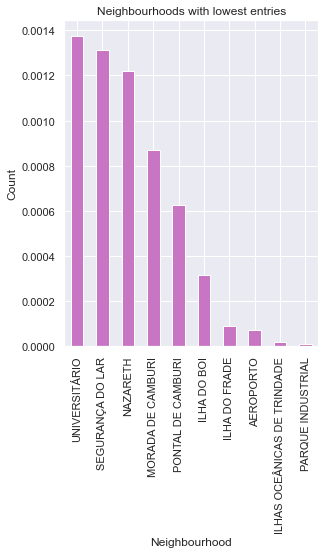

In [85]:
plt.figure(figsize=(10,6)) #Describing the neigbourhoods with the highest attendance rate with a bar chart
plt.subplot(1,2,1)
bottom_10_neighbhourhoods = df['Neighbourhood'].value_counts(normalize = True).tail(10)
bottom_10_neighbhourhoods.plot(kind = 'bar', color='#C875C4')
plt.title('Neighbourhoods with lowest entries')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')

The neighborhood of PARQUE INDUSTRIAL is where the least amount of appointments are made.

The images below show how the columns are distributed in a way you can view everything at once

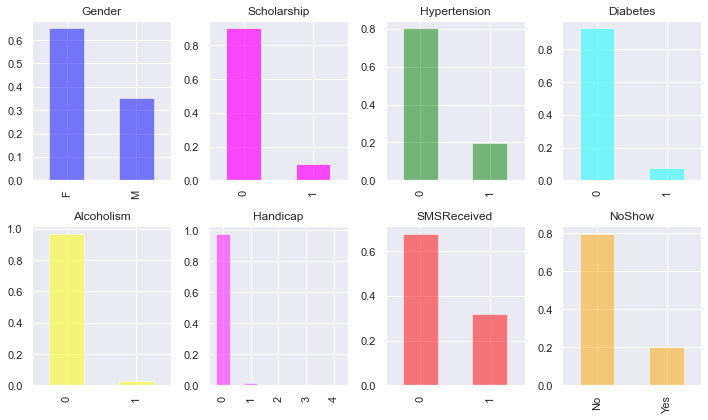

In [104]:
plt.figure(figsize=(10,6))  #The images below show how the columns are distributed in a way you can view everything at once
plt.subplot(2,4,1)
df['Gender'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='blue')
plt.title('Gender')

plt.subplot(2,4,2)
df['Scholarship'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.7,color='magenta')
plt.title('Scholarship')

plt.subplot(2,4,3)
df['Hypertension'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='green')
plt.title('Hypertension')

plt.subplot(2,4,4)
df['Diabetes'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='cyan')
plt.title('Diabetes')

plt.subplot(2,4,5)
df['Alcoholism'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='yellow')
plt.title('Alcoholism')

plt.subplot(2,4,6)
df['Handicap'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='magenta')
plt.title('Handicap')


plt.subplot(2,4,7)
df['SMSReceived'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='red')
plt.title('SMSReceived')

plt.subplot(2,4,8)
df['NoShow'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='orange')
plt.title('NoShow')

plt.tight_layout()
plt.show()

Showing the relationship between age range and noshow

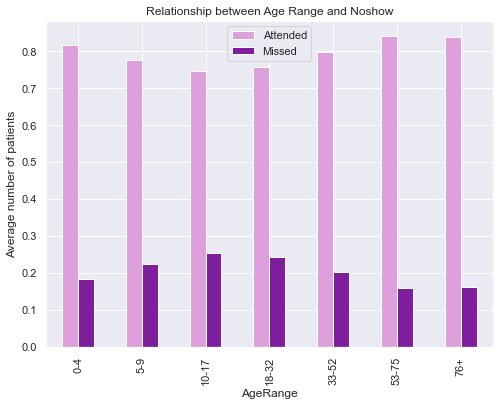

In [139]:
Dol = df.groupby(['AgeRange'])['NoShow'].count() #Showing the relationship between age range and noshow
Dob = df.groupby(['AgeRange', 'NoShow'])['NoShow'].count()
Doh = Dob/Dol
Doh.unstack().plot(kind = 'bar', figsize = (8,6),color=['#DDA0DD', '#7E1E9C'])
plt.title('Relationship between Age Range and Noshow')
plt.ylabel('Average number of patients')
plt.legend(['Attended','Missed']);

In [143]:
df.groupby('SMSReceived').NoShow.value_counts(normalize=True) #checking the percentage of people that got sms with the percentage of Noshow

SMSReceived  NoShow
0            No        0.832965
             Yes       0.167035
1            No        0.724255
             Yes       0.275745
Name: NoShow, dtype: float64

In [ ]:
 #using define function to plot a bar chart to represent the relation between SMS received and NoShow

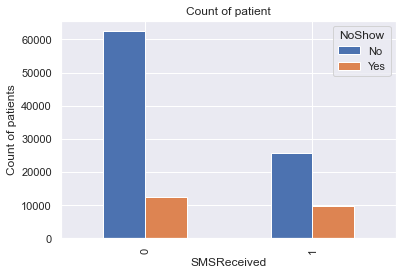

In [174]:
def bar_plot(arc1, arc2, arc3, arc4):
    pd.crosstab(arc1,arc2).plot(kind='bar')
    plt.title(arc3)
    plt.xlabel(arc4)
    plt.ylabel('Count of patients')
bar_plot(df.SMSReceived, df.NoShow, 'Count of patient', 'SMSReceived')

We can see from the code cell above that 83% of people who did not receive an SMS reminder showed up for their appointments.
An SMS reminder was received by about 72% of people, and they also showed up for their appointments.

In [163]:
df.groupby('Alcoholism').NoShow.value_counts(normalize=True)#checking the percentage of people that is addicted to  alcochol with the percentage of Noshow

Alcoholism  NoShow
0           No        0.798052
            Yes       0.201948
1           No        0.798512
            Yes       0.201488
Name: NoShow, dtype: float64

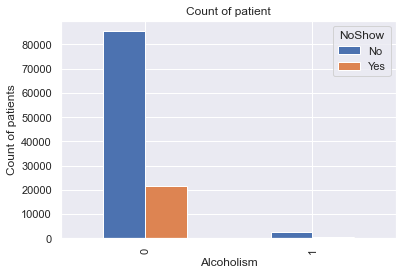

In [175]:
bar_plot(df.Alcoholism, df.NoShow, 'Count of patient', 'Alcoholism') #using a bar chart to represent the relation between SMS received and NoShow

Realtionship between DaysWaited and NoShow

Obtain patients with waiting times of no more than 12 days, together with the values for the total number of specified columns.
Patients who attended and those who did not are represented by the total count of the relevant columns values.
To determine how many patients attended and how many didn't, divide tob by toa.

In [181]:
wait_df = df.query('DaysWaited <= 12') #get patients who have waiting days of not more than 12 days,
toa = wait_df.groupby(['DaysWaited'])['NoShow'].count() # Total count of selected columns values.
tob = wait_df.groupby(['DaysWaited', 'NoShow'])['NoShow'].count() #Total count of selected columns values against patients who attended and those who missed.
toc = tob/toa #Divide tob by toa to get the count of patients who attended and those who missed

In [ ]:
#Total count of selected columns values

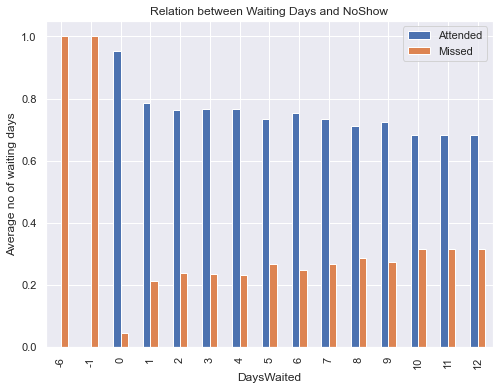

In [182]:
toc.unstack().plot(kind = 'bar', figsize = (8,6));  #chart showing Realtionship between DaysWaited and NoShow
plt.title('Relation between Waiting Days and NoShow')
plt.ylabel('Average no of waiting days')
plt.legend(['Attended','Missed']);

The number of waiting days and the number of patients who show up are directly related. 
Patients who planned an appointment on the specified day showed up. 
However, a rise in waiting days has an impact on attendance; the longer patients wait for their appointment, 
the less likely they are to show up on the scheduled date.
Because certain rows in the dataset have appointment days that fall before their scheduled days, the bar chart's x values are negative.

Deductions Made

1 An increase in waiting days has a detrimental impact on attendance.
2 20% of patients missed their appointments, compared to 80% who showed up.
3 Even while it may not be directly related, it was amazing to recall that more people showed up without receiving an SMS         reminder.
4 The likelihood of showing up rises for patients who are younger or older, but it falls for those who are middle-aged. The age   groups most likely to show up are: 55 to 74 years of age, 10 to 17
5 Patients who did not sign up for Bolsa Familia, Brazil's welfare program, turned up more frequently than those who did.

In [ ]:
Limitations



1 Negative x values can be visible in the bar chart of question 3 because the collection contains some rows where appointment     days fall before their scheduled days.
2 Most features only have two possible values, 0 or 1, making it challenging to conduct in-depth research and identify     correlations.
3 There is not much information gathered from the older population.
4 No information is available regarding whether the patient skipped or cancelled the appointment.
5 The purpose of the visit and the doctor's area of expertise may be used to improve analysis of a patient's no-show.8

References

https://matplotlib.org/stable/tutorials/colors/colors.html

https://www.kaggle.com/code/mohamedhassan1911/why-do-30-of-patients-miss-their-appointments

NameError: name 'df' is not defined